In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# reading data and getting the head 
fake_news = pd.read_csv("news.csv")
print(fake_news.shape)
print(fake_news.head())

(6335, 4)
   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [43]:
# getting labels from the dataframe
labels = fake_news.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [32]:
# splitting the dataset into training and testing models
# splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(fake_news['text'], labels, test_size=0.2, random_state=7)

In [33]:
# initializing a TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)


In [34]:
# fitting and transforming trainset, transforming testset
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test) 


In [35]:
# initializing a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [36]:
# predicting on the testset and calculating the accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

Accuracy: 92.9%


In [37]:
# building a confusion matrix
confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

array([[590,  48],
       [ 42, 587]], dtype=int64)

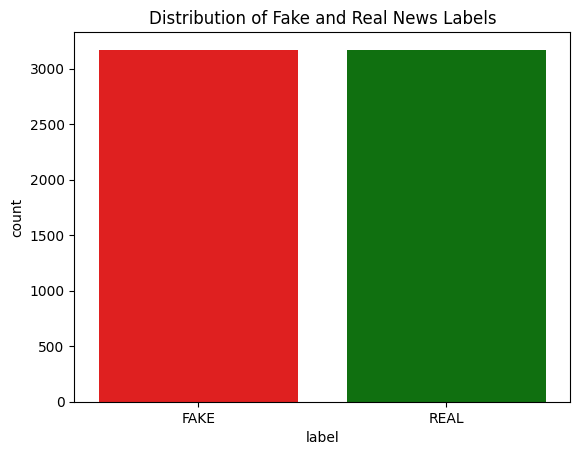

In [48]:
# creating visualizations
# distribution of labels visuals
# Set custom colors
colors = {'FAKE': 'red', 'REAL': 'green'}

# Use the 'hue' parameter and set 'legend' to False
sns.countplot(x='label', hue='label', data=fake_news, palette=colors, legend=False)

plt.title('Distribution of Fake and Real News Labels')
plt.show()

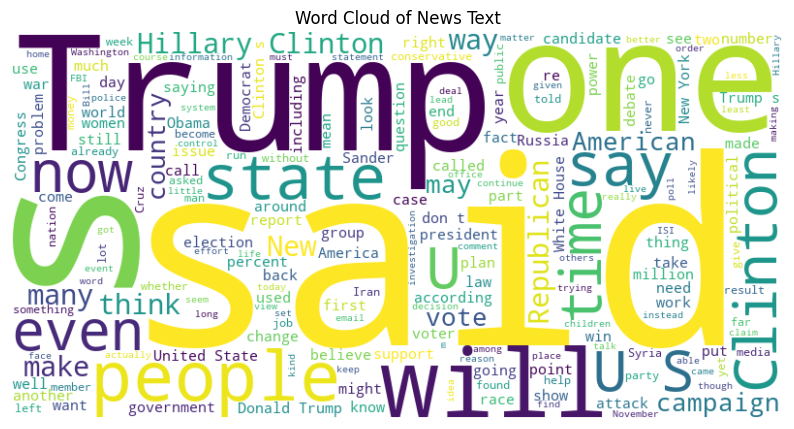

In [50]:
# creating a wordcloud visualization of most frequently used words
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(fake_news['text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Text')
plt.show()

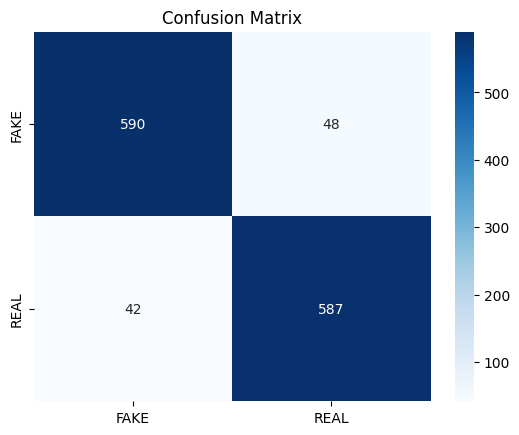

In [51]:
# creating a seaborn heatmap to display the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.title('Confusion Matrix')
plt.show()


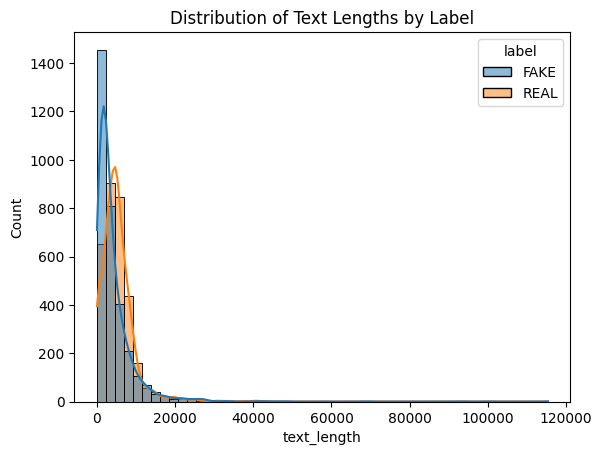

In [52]:
# plotting the distribution of text lenghts
fake_news['text_length'] = fake_news['text'].apply(len)
sns.histplot(data=fake_news, x='text_length', hue='label', bins=50, kde=True)
plt.title('Distribution of Text Lengths by Label')
plt.show()


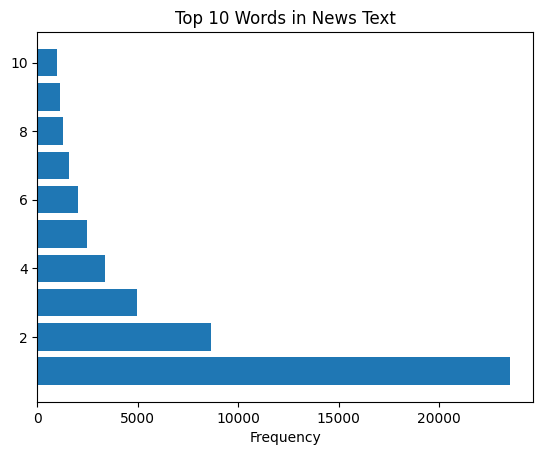

In [62]:
# Reading data and getting the head
fake_news = pd.read_csv("news.csv")

# Get the top N words
n = 10
vectorizer = CountVectorizer(stop_words='english')
word_freq = Counter(vectorizer.fit_transform(fake_news['text']).sum(axis=0).flat)
top_words = word_freq.most_common(n)

# Plot the bar chart
plt.barh(*zip(*top_words))
plt.xlabel('Frequency')
plt.title(f'Top {n} Words in News Text')
plt.show()
